In [1]:
# Adds the parent directory '..' (go up one level) to the system path 
# so `src/` will be found when importing `decision_rules.py` as 
# `src.decision_rules`
import sys
sys.path.append('..')

# Decision Rules

Frequently we will encounter imbalanced datasets, in which each class is not equally represented. If the imbalance is not addressed, classifiers treat the costs of misclassifying to the positive class and to the negative class as equal (traditional classifiers optimize for accuracy.) Because the majority instances outnumber the minority instances, this leads to models that tend to classify instances to the majority class and perform poorly at classifying the minority class, which is often the class of interest. 

Imbalanced datasets highlight that the misclassification costs implicit in model algorithms don't always align with our judgement of real-world misclassification costs. Sometimes it is equally important to get every instance right. Sometimes it is more important to identify some classes than others. A data scientist should always consider the costs and frequencies of different misclassifications.

There are many strategies for dealing with imbalanced classes, which are more generally strategies for developing models that are optimized for different misclassification cost scenarios.
- Optimizing for metrics other than accuracy (Parts 2-4.) 
- Specifying misclassification costs for the model training (explore the `class_weight` parameter in scikit-learn classifiers.)
- Ensembling diverse classifiers (# 12.) 
- Sampling from the data to produce a more balanced dataset (Part 5.)

## Basic

### Part 1: Confusion Matrices

Say we ran a model and got the following true labels and predicted probabilities of the positive class:

| Observation | True Label | Predicted Probability |
|:-----------:|:----------:|:---------------------:|
|       0     |      0     |          0.2          |
|       1     |      0     |          0.6          |
|       2     |      1     |          0.4          |

1. Write down the predicted labels using a default 0.5 probability threshold.

| Observation | True Label | Predicted Probability | >=0.5  |
|:-----------:|:----------:|:---------------------:|:------:|
|       0     |      0     |          0.2          |        |
|       1     |      0     |          0.6          |        |
|       2     |      1     |          0.4          |        |

*For each of the tables below, the threshold divides predicted probabilities into two classes:*  
- *predicted probability >= threshold -> label positive*  
- *predicted probability < threshold -> label negative*
    
| Observation | True Label | Predicted Probability | >=0.5 |
|:-----------:|:----------:|:---------------------:|:-----:|
|       0     |      0     |          0.2          |   0   |
|       1     |      0     |          0.6          |   1   |
|       2     |      1     |          0.4          |   0   |

2. Write down the confusion matrix using a 0.5 threshold.

|    *Threshold : 0.5*   | Actual Positive | Actual Negative |
|:----------------------:|:---------------:|:---------------:|
| **Predicted Positive** |                 |                 |
| **Predicted Negative** |                 |                 |

|    *Threshold : 0.5*   | Actual Positive | Actual Negative |
|:----------------------:|:---------------:|:---------------:|
| **Predicted Positive** |       0         |         1       |
| **Predicted Negative** |       1         |         1       |

3. Find a another probability threshold that produces a different confusion matrix. Write down the threshold and the confusion matrix.

| Observation | True Label | Predicted Probability | >=0.5 | >= ?  |
|:-----------:|:----------:|:---------------------:|:-----:|:-----:|
|       0     |      0     |          0.2          |       |       |
|       1     |      0     |          0.6          |       |       |
|       2     |      1     |          0.4          |       |       |

|    *Threshold : (?)*   | Actual Positive | Actual Negative |
|:----------------------:|:---------------:|:---------------:|
| **Predicted Positive** |                 |                 |
| **Predicted Negative** |                 |                 |

| Observation | True Label | Predicted Probability |  >=0.5    |  >=0.2    |
|:-----------:|:----------:|:---------------------:|:---------:|:---------:|
|       0     |      0     |          0.2          |     0     |     1     |
|       1     |      0     |          0.6          |     1     |     1     |
|       2     |      1     |          0.4          |     0     |     1     |

|    *Threshold : 0.2*   | Actual Positive | Actual Negative |
|:----------------------:|:---------------:|:---------------:|
| **Predicted Positive** |       1         |         2       |
| **Predicted Negative** |       0         |         0       |

4. Record thresholds that produce all 4 different confusion matrices for this data and write out the matrices. You have already found 2 thresholds.

| Observation | True Label | Predicted Probability | >= ?  | >= ?  | >= ?  | >= ?  |
|:-----------:|:----------:|:---------------------:|:-----:|:-----:|:-----:|:-----:|
|       0     |      0     |          0.2          |       |       |       |       |
|       1     |      0     |          0.6          |       |       |       |       |
|       2     |      1     |          0.4          |       |       |       |       |

|    *Threshold : (?)*   | Actual Positive | Actual Negative |
|:----------------------:|:---------------:|:---------------:|
| **Predicted Positive** |                 |                 |
| **Predicted Negative** |                 |                 |

|    *Threshold : (?)*   | Actual Positive | Actual Negative |
|:----------------------:|:---------------:|:---------------:|
| **Predicted Positive** |                 |                 |
| **Predicted Negative** |                 |                 |

|    *Threshold : (?)*   | Actual Positive | Actual Negative |
|:----------------------:|:---------------:|:---------------:|
| **Predicted Positive** |                 |                 |
| **Predicted Negative** |                 |                 |

|    *Threshold : (?)*   | Actual Positive | Actual Negative |
|:----------------------:|:---------------:|:---------------:|
| **Predicted Positive** |                 |                 |
| **Predicted Negative** |                 |                 |

*Notice how the sum of the **Actual Positive** and **Actual Negative** columns always sum to the true label values: 1 positive and 2 negatives. Those counts just move between the **Predicted Positive** and **Predicted Negative** rows as we move the threshold.*

| Observation | True Label | Predicted Probability | >=0.2 | >=0.4 | >=0.6 | >=1.0 |
|:-----------:|:----------:|:---------------------:|:-----:|:-----:|:-----:|:-----:|
|       0     |      0     |          0.2          |   1   |   0   |   0   |   0   |
|       1     |      0     |          0.6          |   1   |   1   |   1   |   0   |
|       2     |      1     |          0.4          |   1   |   1   |   0   |   0   |

|    *Threshold : 0.2*   | Actual Positive | Actual Negative |
|:----------------------:|:---------------:|:---------------:|
| **Predicted Positive** |       1         |         2       |
| **Predicted Negative** |       0         |         0       |

|    *Threshold : 0.4*   | Actual Positive | Actual Negative |
|:----------------------:|:---------------:|:---------------:|
| **Predicted Positive** |       1         |         1       |
| **Predicted Negative** |       0         |         1       |

|    *Threshold : 0.6*   | Actual Positive | Actual Negative |
|:----------------------:|:---------------:|:---------------:|
| **Predicted Positive** |       0         |         1       |
| **Predicted Negative** |       1         |         1       |

|    *Threshold : 1.0*   | Actual Positive | Actual Negative |
|:----------------------:|:---------------:|:---------------:|
| **Predicted Positive** |       0         |         0       |
| **Predicted Negative** |       1         |         2       |

### Part 2: Profit Matrices

We'll be working with customer data from a BU&U, a fictional telecom company. 

Let's create profit matrices considering different scenarios.

BU&U is concerned about customer churn (a customer canceling their service.) On average, each customer generates a `$`4 profit per month for the company, so when they churn the company loses that `$`4. A customer can be prevented from churning by sending them a promotion. BU&U wants to send promotions to customers it thinks will churn, but it will cost the company `$`1 whether or not the customer was actually going to churn. BU&U wants to evaluate the impact of using churn prediction models to target promotions to customers most likely to churn.

We need to establish a baseline before creating a profit matrix. We can do this in many different ways. You can think of the baseline as the planned budget for the company. Any non-zero values in the profit matrix are deviations from that budget.

For example, suppose the baseline budget **assumes no customers will ever churn**. In the tables below, "Actual Negative" means the customer is happy and won't churn and "Actual Positive" means a customer is going to churn, so they will leave if they don't receive the promotion (False Negative.) If a customer wasn't going to churn and we predict that correctly (so we don't send them a promotion) then we're on budget.


|                        | Actual Positive | Actual Negative |
| ---------------------- |:---------------:|:---------------:|
| **Predicted Positive** |                 |                 |
| **Predicted Negative** |                 |        0        |

If the customer is going to churn and we don't send them a promotion, we'll be at -`$`4 relative to the budget. If we predict they will churn we'll send them a promotion that will definitely make them stay, so we'll lose `$`1 whether or not they would have churned. Our final profit matrix is


|                        | Actual Positive | Actual Negative |
| ---------------------- |:---------------:|:---------------:|
| **Predicted Positive** |       -1        |        -1       |
| **Predicted Negative** |       -4        |         0       |

Note that none of the cases are positive because our baseline budget was highly optimistic.

5. Create another profit matrix for the same scenario, but assuming that churning is the status quo and that sending a promotion to someone costs money but does prevent someone from churning. 

|                        | Actual Positive | Actual Negative |
| ---------------------- |:---------------:|:---------------:|
| **Predicted Positive** |                 |                 |
| **Predicted Negative** |                 |                 |

*This budget is highly pessimistic, so there should be a positive value a customer doesn't churn and zero if they do (minus the cost of promotions).*
*When a customer churns the cost is 0.*  
*When a customer stays the benefit is 4.*  
*When we send a promotion it costs 1 but prevents a customer from churning.*  

|      Profit Matrix     | Actual Positive | Actual Negative |
|:----------------------:|:---------------:|:---------------:|
| **Predicted Positive** |  0 - 1 + 4 = 3  |    4 - 1 = 3    |
| **Predicted Negative** |        0        |        4        |

6. Consider a different scenario. BU&U wants you to evaluate the **additional** profit that churn prediction models can generate relative to the status quo of not trying to prevent customer churn. Specify the profit matrix for this scenario as a 2x2 numpy array. Start by considering the costs of the company doing nothing, and then the costs and profits after they send promotions to customers. The matrix should contain the benefit of true positives, false positives, true negatives and false negatives in the following form:

```python
[[tp, fp]
 [fn, tn]]
```

Use this profit matrix for the rest of the assignment.

*When we prevent a customer from churning the benefit is 4 - 1 = 3.*  
*When we send the promotion to a customer that would have stayed anyway the cost is -1.*  
*When we take no action then the status quo costs 0.*

In [2]:
profit_mat = [[3, -1], [0, 0]]

7. Using the model at the beginning of the assignment and your confusion matrices and profit matrix, calculate the expected profit per customer at different thresholds. Your answers should match this plot. **Do not spend time recreating the plot!**

<div align='center'>
    <img src='../images/toy_profit_curve.png' width='600'/>
</div>

*Using the `*` operator on two numpy arrays of the same shape performs element-wise multiplication, which lets us calculate the profit associated with each correct or incorrect type of classification. Then we sum the values in the resulting 2x2 matrix and divide by the total number of observations to get the expected profit.*

*Notice how expressive the rest of the code is. There are no hard coded values outside of our variable declarations. This makes it easy to read the variable declarations and understand what ideas they represent, and easy to read the body of the `for` loop. Part of this is achieved with our use of the [`zip()`][1] function.*

<!-- References -->
[1]: https://docs.python.org/3.3/library/functions.html#ziphttps://docs.python.org/3.3/library/functions.html#zip

In [3]:
import numpy as np
profit_mat = [[3, -1], [0, 0]]
# Create confusion matrices.
conf_mat_0pt2 = np.array([[1, 2], [0, 0]])
conf_mat_0pt4 = np.array([[1, 1], [0, 1]])
conf_mat_0pt6 = np.array([[0, 1], [1, 1]])
conf_mat_1pt0 = np.array([[0, 0], [1, 2]])
# Calculate expected profits per customer.
ep_0pt2 = (profit_mat * conf_mat_0pt2).sum() / conf_mat_0pt2.sum()
ep_0pt4 = (profit_mat * conf_mat_0pt4).sum() / conf_mat_0pt4.sum()
ep_0pt6 = (profit_mat * conf_mat_0pt6).sum() / conf_mat_0pt6.sum()
ep_1pt0 = (profit_mat * conf_mat_1pt0).sum() / conf_mat_1pt0.sum()
# Print expected profits.
thresholds = np.array([0.2, 0.4, 0.6, 1.0])
exp_profits = np.array([ep_0pt2, ep_0pt4, ep_0pt6, ep_1pt0])
for threshold, exp_profit in zip(thresholds[::-1], exp_profits[::-1]):
    print('The expected profit per customer at a threshold of '
          f'{threshold} is {exp_profit:>5.2f}.')

The expected profit per customer at a threshold of 1.0 is  0.00.
The expected profit per customer at a threshold of 0.6 is -0.33.
The expected profit per customer at a threshold of 0.4 is  0.67.
The expected profit per customer at a threshold of 0.2 is  0.33.


### Part 3: Profit Curve Implementation

8. Using the code stub provided in `src/decision_rules.py`, write a function called `profit_curve()` that takes these arguments:  
    `y_true`: True labels for each datapoint (either 0 or 1.)  
    `y_probs`: Predicted probability for being the positive class for each datapoint (between 0 and 1.)  
    `profit_mat`: Your profit matrix.  
    `per_instance`: Boolean value for whether to calculate total or per instance profit. Default is False.

    Here's the pseudocode for `profit_curve()`. Note the similarity to building an ROC plot!

    ```
    profit_curve(y_true, y_probs, profit_mat, per_instance)
    1    thresholds = sort y_probs in decreasing order and append 1 to 
             the beginning so you consider all classification 
             thresholds
    2    for threshold in thresholds
    3        label all observations with 
                 predicted probabilities >= threshold as the 
                 positive class
    4        compute the confusion matrix using true labels and 
                 predicted labels (call the standard_confusion_matrix 
                     function in src/decision_rules.py)
    5        calculate expected profit
                 - multiply each of the 4 counts in the confusion matrix 
                       with its corresponding value in the profit matrix
                 - sum the products
    6    if per_instance
    7        divide expected profits by the number of 
                 sample observations
    8    return an array of expected profits and an array of 
             corresponding thresholds
    ```

9. Test your `profit_curve()` function on the same toy example from above:

    ```python
    import matplotlib.pyplot as plt
    import numpy as np
    from src.decision_rules import profit_curve

    y_labels = [0, 0, 1]
    y_probs = [0.2, 0.6, 0.4]
    profit_mat = [[3, -1], [0, 0]]
    # You will get the same profit values as Part 2 if you pass 
    # `per_instance=True` to `profit_curve`.
    exp_profits, thresholds = profit_curve(y_labels, y_probs, profit_mat)
    plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize=(8, 4.5), tight_layout=True)
    pcts = np.linspace(0, 100, len(thresholds))
    ax.step(pcts, exp_profits, 'k', where='post', label='Toy Classifier')
    ax.set(title="Profits",
           xlabel="Percentage of Test Instances (decreasing by score)",
           ylabel="Profit")
    ax.legend()
    plt.show()
    ```
    
<div align='center'>
    <img src='../images/toy_profit_curve_v2.png', width=600>
</div>

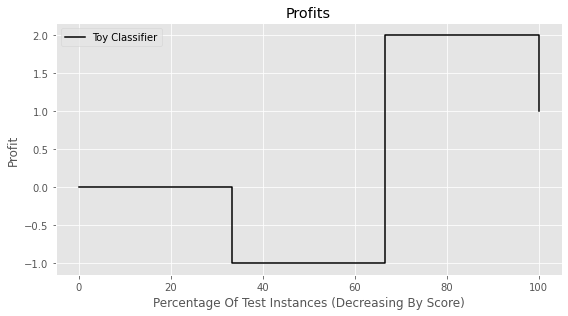

In [4]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('..')
from src.decision_rules import profit_curve

y_labels = [0, 0, 1]
y_probs = [0.2, 0.6, 0.4]
profit_mat = [[3, -1], [0, 0]]
# You will get the same profit values as Part 2 if you pass 
# `per_instance=True` to `profit_curve`.
exp_profits, thresholds = profit_curve(y_labels, y_probs, profit_mat)
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 4.5), tight_layout=True)
pcts = np.linspace(0, 100, len(thresholds))
ax.step(pcts, exp_profits, 'k', where='post', label='Toy Classifier')
ax.set(title="Profits",
       xlabel="Percentage Of Test Instances (Decreasing By Score)",
       ylabel="Profit")
ax.legend()
plt.show()

## Advanced

### Part 4: Profit Curve Investigation

10. Now you're ready to plot profit curves using BU&U data!

    Use `pandas` to load the dataset from `data/churn.csv`. Drop the "State", "Area Code" and "Phone" columns. If there are any columns with only two values, convert those values to 1's and 0's. The "Churn?" column will be our target.

*Because this must be done with code, it may be helpful to encapsulate cleaning the data in a function, so it can be used in other places. This has been done in `load_churn` in `src/decision_rules.py`.*

In [5]:
import pandas as pd
df_churn = pd.read_csv('../data/churn.csv')
df_churn.drop(columns=['State', 'Area Code', 'Phone'], inplace=True)
# Print the unique values from columns containing only 2 values.
for column in df_churn.columns:
    if df_churn[column].nunique() == 2:
        print(column, df_churn[column].unique())

Int'l Plan ['no' 'yes']
VMail Plan ['yes' 'no']
Churn? ['False.' 'True.']


In [6]:
df_churn.replace({'no': 0, 'yes': 1, 'False.': 0, 'True.': 1}, inplace=True)

11. Fit a logistic regression to the churn data using these settings:
```python
LogisticRegression(penalty='none', max_iter=1e4)
```
...and build off the plotting code above to create the corresponding profit curve. Don't forget to split the data into a training set and a validation/test set. Which set should you use to plot the profit curve?

    Use this profit matrix if you are not already:
```python
profit_mat = np.array([[3, -1], [0, 0]])
```
    Note: If you have a scikit-learn model stored as a variable, say `model`, you can use `model.__class__.__name__` to return the name of the model class. This will be helpful for labeling plots.

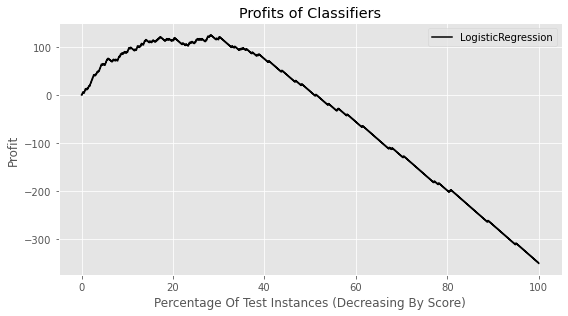

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import sys
sys.path.append('..')
from src.decision_rules import profit_curve

df_churn = pd.read_csv('../data/churn.csv')
df_churn.drop(columns=['State', 'Area Code', 'Phone'], inplace=True)
df_churn.replace({'no': 0, 'yes': 1, 'False.': 0, 'True.': 1}, inplace=True)
y = df_churn.pop('Churn?')
X = df_churn
# Choosing a random_state makes the split reproducible by others. 
# 'stratify' forces the test set to have the same class balance as the 	
# original data, which we assume reflects the real-world class balance. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1119, stratify=y)
# `penalty` determines whether the logistic regression is regularized 
# and how. `max_iter` resolves the warning that the 
# logistic regression algorithm did not converge.
lr = LogisticRegression(penalty='none', max_iter=1e4)
# Model performance is evaluated on a validation/test set.
# Predicted probabilities of being the positive class.
y_test_probs = lr.fit(X_train, y_train).predict_proba(X_test)[:, 1]

# Code from earlier.
profit_mat = [[3, -1], [0, 0]]
exp_profits, thresholds = profit_curve(y_test, y_test_probs, 
                                       profit_mat)
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 4.5), tight_layout=True)
pcts = np.linspace(0, 100, len(thresholds))
ax.step(pcts, exp_profits, 'k', where='post', label=lr.__class__.__name__)
ax.set(title='Profits of Classifiers',
       xlabel='Percentage Of Test Instances (Decreasing By Score)',
       ylabel='Profit')
ax.legend()
plt.show()

12. Implement a `plot_profit_curve()` function with the following parameters:
    ```
    model, profit_mat, X, y
    ```
    You should be able to use it like this:

    ```python
    lr = LogisticRegression(penalty='none', max_iter=1e4)
    lr.fit(X_train, y_train)
    profit_mat = [[3, -1], [0, 0]]
    plot_profit_curve(lr, profit_mat, X_test, y_test)
    plt.show()
    ```
    The shape of your profit curve should look similar to this:
    <div align='center'>
        <img src='../images/profit_curve_lr.png', width=600>
    </div>

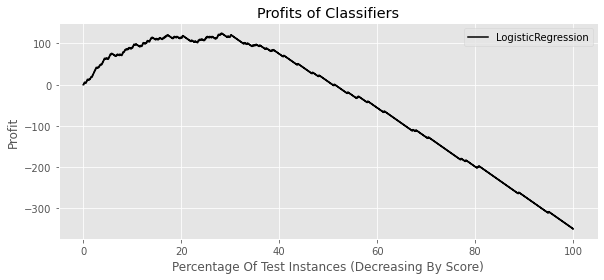

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import sys
sys.path.append('..')
from src.decision_rules import load_churn, plot_profit_curve

X, y = load_churn('../data/churn.csv', return_X_y=True,
                  as_frame=True)
# Drop categorical columns.
X.drop(columns=['State', 'Area Code', 'Phone'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1119, stratify=y)

lr = LogisticRegression(penalty='none', max_iter=1e4)
lr.fit(X_train, y_train)
profit_mat = [[3, -1], [0, 0]]
plt.style.use('ggplot')
plot_profit_curve(lr, profit_mat, X_test, y_test)
plt.show()

13. Now use the following code snippet to compare several models.

    Note: This uses the provided function `plot_profit_curve_v2()` and not the plotting function you wrote.

    ```python
    from sklearn.preprocessing import StandardScaler
    from sklearn.ensemble import GradientBoostingClassifier as GBC
    from sklearn.ensemble import RandomForestClassifier as RF
    from sklearn.svm import SVC
    from sklearn.linear_model import LogisticRegression
    from src.decision_rules import plot_profit_curve_v2

    # Support Vector Machine separating hyperplanes are influenced by 
    # feature sizes.
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)
    models = [GBC(), RF(n_jobs=-1), SVC(probability=True), 
              LogisticRegression(penalty='none')]
    random_state = 1310
    for i, model in enumerate(models):
        model.set_params(**{'random_state': random_state})
        model.fit(X_train_std, y_train)

    fig, ax = plt.subplots(figsize=(16, 9))
    profit_mat = [[3, -1], [0, 0]]
    for model in models:
        plot_profit_curve_v2(model, profit_mat, X_test_std, y_test, ax=ax)
    # Add profit matrix.
    tp_profit, fp_profit, fn_profit, tn_profit = profit_mat.ravel()
    table = [['Profit', 'Actual +', 'Actual -'], 
             ['Predicted +', tp_profit, fp_profit],
             ['Predicted -', fn_profit, tn_profit]]
    ax.table(cellText=table, cellLoc='center', colWidths=[0.1] * 3, 
             loc='lower left')
    plt.show()
    ```

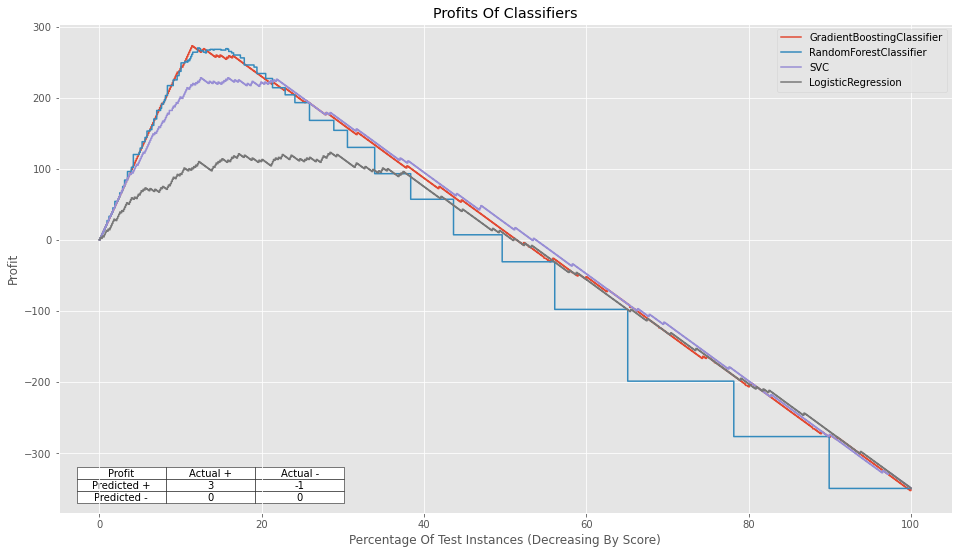

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import sys
sys.path.append('..')
from src.decision_rules import load_churn, plot_profit_curve_v2

X, y = load_churn('../data/churn.csv', return_X_y=True,
                  as_frame=True)
# Drop categorical columns.
X.drop(columns=['State', 'Area Code', 'Phone'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1119, stratify=y)

# Support Vector Machine separating hyperplanes are influenced by 
# feature sizes.
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

models = [GBC(), RF(n_jobs=-1), SVC(probability=True), 
          LogisticRegression(penalty='none')]
random_state = 1310
for i, model in enumerate(models):
    model.set_params(**{'random_state': random_state})
    model.fit(X_train_std, y_train)

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(16, 9))
profit_mat = np.array([[3, -1], [0, 0]])
for model in models:
    plot_profit_curve_v2(model, profit_mat, X_test_std, y_test, ax=ax)
# Add profit matrix.
tp_profit, fp_profit, fn_profit, tn_profit = profit_mat.ravel()
table = [['Profit', 'Actual +', 'Actual -'], 
         ['Predicted +', tp_profit, fp_profit],
         ['Predicted -', fn_profit, tn_profit]]
ax.table(cellText=table, cellLoc='center', colWidths=[0.1] * 3, 
         loc='lower left')
plt.show()

14. What's the maximum profit that we can achieve, at what threshold and which model should we use to get it? What proportion of the customer base does this target?

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import sys
sys.path.append('..')
from src.decision_rules import load_churn, profit_curve

X, y = load_churn('../data/churn.csv', return_X_y=True,
                  as_frame=True)
# Drop categorical columns.
X.drop(columns=['State', 'Area Code', 'Phone'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1119, stratify=y)

# Support Vector Machine separating hyperplanes are influenced by 
# feature sizes.
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

models = [GBC(), RF(n_jobs=-1), SVC(probability=True), 
          LogisticRegression(penalty='none')]
random_state = 1310
for i, model in enumerate(models):
    model.set_params(**{'random_state': random_state})
    model.fit(X_train_std, y_train)

profit_mat = [[3, -1], [0, 0]]
dfs = []
for model in models:
    y_probs = model.predict_proba(X_test_std)[:, 1]
    exp_profits, thresholds = profit_curve(y_test, y_probs, profit_mat)
    dfs.append(pd.DataFrame(
        {'name': np.repeat(
            [model.__class__.__name__], len(exp_profits)),
         'exp_profit': exp_profits,
         'threshold': thresholds}))
# Concatenating a list of DataFrames is recommended over appending 
# DataFrames within a loop.
df_exp_profit = pd.concat(dfs).reset_index(drop=True)

def top_n_prop(row):
    """Helper function to calculate the proportion of thresholds 
    greater than the current threshold (top n proportion.)
    """
    mask_same_name = df_exp_profit['name'] == row['name']
    less_than_threshold = (
        row['threshold'] < df_exp_profit[mask_same_name]['threshold'])
    return less_than_threshold.mean()

df_exp_profit['top_n_prop'] = df_exp_profit.apply(top_n_prop, axis=1)

max_i = df_exp_profit['exp_profit'].idxmax()
name, profit, threshold, top_n_prop = df_exp_profit.loc[max_i]
print(f'Of the {len(models)} classifiers, {name} achieves the '
      f'maximum\nprofit of ${profit:.2f} with a threshold of '
      f'{threshold:.2f}, targeting {top_n_prop * 100:.2f}% of the\n'
      'customer base.')

Of the 4 classifiers, GradientBoostingClassifier achieves the maximum
profit of $273.00 with a threshold of 0.37, targeting 11.38% of the
customer base.


## Extra Credit

### Part 5: Sampling Methods

Because traditional classifiers optimize for accuracy, they tend to perform poorly at identifying the minority class in imbalanced datasets where the classes are not well-separated. Sampling methods alter the training set to create a more balanced class distribution.

<div align='center'>
    <img src='../images/sampling_methods.png' width=600>
</div>

There are many different sampling methods to address imbalanced classes. We will explore 3.
- (Random) Undersampling, which randomly samples a subset from the majority class.
- (Random) Oversampling, which randomly duplicates observations from the minority class.
- SMOTE, a method of oversampling which augments the minority class by generating similar observations.

**(Random) Undersampling**  
    Discard majority class observations at random to reach a desired 
    ratio of minority class observations to majority class 
    observations.

**(Random) Oversampling**  
    Duplicate sets of minority class observations to reach a desired 
    ratio of minority class observations to majority class 
    observations. For example, if there are 10 minority class 
    instances and 103 majority class instances, oversampling would 
    copy the 10 minority instances 9 times each and sample an 
    additional 3 minority instances without replacement.

15. **SMOTE - Synthetic Minority Over-sampling TEchnique**  
SMOTE is a method of oversampling the minority class that involves creating synthetic minority class examples.

    SMOTE first selects a minority class instance (call it *a*) at random and finds its *k* nearest minority class neighbors. The synthetic instance is then created by choosing one of the *k* nearest neighbors (call it *b*) at random and connecting *a* and *b* to form a line segment in the feature space, and then picking a point randomly along that line (ie. a convex combination of the two chosen instances *a* and *b*.)

    Depending upon the amount of over-sampling required, neighbors from the k nearest neighbors are randomly chosen. For instance, if the amount of over-sampling needed is 200%, only two neighbors from the five nearest neighbors are chosen and one sample is generated in the direction of each.

Implement the [original algorithm][1] in python as the class `SMOTE`. Use the `src.decision_rules.NearestNeighbors` class for finding nearest neighbors. It works exactly like [`sklearn.neighbors.NearestNeighbors`][2]. Also, take a look at the [`numpy.random`][3] module. It will be useful for the randomization tasks needed in this class.
    
<!-- References -->
[1]: https://arxiv.org/pdf/1106.1813.pdf
[2]: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors
[3]: https://numpy.org/doc/stable/reference/random/index.html#quick-start
```
Algorithm SMOTE(T, N, k)  
Input: Number of minority class samples T; Amount of SMOTE N%; Number of nearest
neighbors k  
Output: (N/100)  T synthetic minority class samples  
1  (∗ If N is less than 100%, randomize the minority class samples as only a random
       percent of them will be SMOTEd. ∗)  
2  if N < 100  
3      then Randomize the T minority class samples  
4      T = (N/100) ∗ T  
5      N = 100
6  endif
7  N = (int)(N/100) (∗ The amount of SMOTE is assumed to be in integral multiples of
       100. ∗)
8  k = Number of nearest neighbors
9  numattrs = Number of attributes
10 Sample[ ][ ]: array for original minority class samples
11 newindex: keeps a count of number of synthetic samples generated, initialized to 0
12 Synthetic[ ][ ]: array for synthetic samples
   (∗ Compute k nearest neighbors for each minority class sample only. ∗)
13 for i ← 1 to T
14     Compute k nearest neighbors for i, and save the indices in the nnarray
15     Populate(N, i, nnarray)
16 endfor

   Populate(N, i, nnarray) (∗ Function to generate the synthetic samples. ∗)
17 while N =/= 0
18     Choose a random number between 1 and k, call it nn. This step chooses one of
           the k nearest neighbors of i.
19     Compute: gap = random number between 0 and 1
20     for attr ← 1 to numattrs
21         Compute: dif = Sample[nnarray[nn]][attr] − Sample[i][attr]
22         Synthetic[newindex][attr] = Sample[i][attr] + gap ∗ dif
23     endfor
24     newindex++
25     N = N − 1
26 endwhile
27 return (∗ End of Populate. ∗)
End of Pseudo-Code.
```

Test that your class works by running the code below. Your plot should look similar to the SMOTE plot above. Pay attention to the `# SMOTE the dataset.` section of code for how your class should be instantiated and used.

```python
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from src.decision_rules import SMOTE
# Define dataset.
random_state = 1
X, y = make_classification(
    n_samples=10000, n_features=2, n_redundant=0, 
    n_clusters_per_class=1, weights=[0.99], flip_y=0, 
    random_state=random_state)
# SMOTE the dataset.
T, N = 100, 9800
smote = SMOTE(T, N, random_state=256)
y_sm = np.append(y, np.ones(N))
X_sm = smote.fit_resample(X[y == 1])
X_sm = np.vstack((X, X_sm))
# Scatter plot.
fig, ax = plt.subplots(figsize=(8.5, 4), tight_layout=True)
labels = [0, 1]
for label in labels:
    ax.scatter(X_sm[y_sm == label, 0], X_sm[y_sm == label, 1], 
               label=label)
    ax.set(title='SMOTE', xlabel='Feature 0', ylabel='Feature 1')
    ax.legend()
plt.show()
```

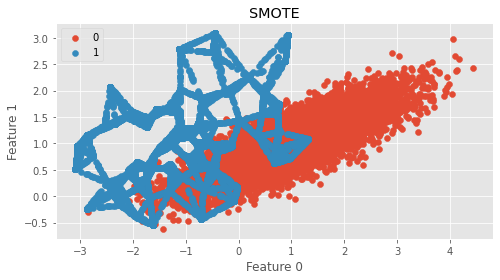

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification

import sys
sys.path.append('..')
from src.decision_rules import SMOTE
# Define dataset.
random_state = 1
X, y = make_classification(
    n_samples=10000, n_features=2, n_redundant=0, 
    n_clusters_per_class=1, weights=[0.99], flip_y=0, 
    random_state=random_state)
# SMOTE the dataset.
T, N = 100, 9800
smote = SMOTE(T, N, random_state=256)
y_sm = np.append(y, np.ones(N))
X_sm = smote.fit_resample(X[y == 1])
X_sm = np.vstack((X, X_sm))
# Scatter plot.
fig, ax = plt.subplots(figsize=(8.5, 4), tight_layout=True)
labels = [0, 1]
for label in labels:
    ax.scatter(X_sm[y_sm == label, 0], X_sm[y_sm == label, 1], 
               label=label)
    ax.axis('scaled')
    ax.legend()
    ax.set(title='SMOTE', xlabel='Feature 0', ylabel='Feature 1')
plt.show()

#### Comparing Methods

16. Try running the documentation examples for the `Undersample`, `Oversample` and `SMOTE_v2` classes to get familiar with the API.
17. Using the churn dataset and a logistic regression model, calculate the expected profit for the different sampling methods and a range of different minority class *percentages* (how can you convert minority to majority ratios into minority class proportions? What is the minority to majority ratio for the starting data, and what is the maximum ending minority to majority ratio? Hint: What is the fewest number of majority class observations possible after sampling for each method?)
18. Which method is best? What minority class percentages maximize expected profit?
19. Try this investigation several times, with a different random train/test split each time. Does the expected profit and optimal sampling proportion vary substantially? How might you deal with this variance?

*`do_sampling_study` in `src/decision_rules.py` contains code to run a simulation study using 3 different train test splits and save the results to a csv file.*

*To avoid data leakage, do not apply sampling methods until the dataset has been split into a training set and a test set, otherwise, data will be generated based on the full dataset, so instances in the training set may be derived from instances in the test set.*

*By measuring various combinations of final minority class proportions and thresholds, we have effectively tuned these hyperparameters. The plot below shows that across all sampling methods to address class imbalance, setting the final minority class proportion to between 0.2 and 0.5 produces the highest expected profits. Undersampling produces the highest profit for a single model, but across all proportions, oversampling, then SMOTE, then undersampling, produce the highest profits.*

*Undersampling to a high minority class proportion means throwing away a lot of majority observations. We can see model performance using undersampling degrade when the minority class proportion is high, because a lot of information about the majority class was discarded.*

*Oversampling to a high minority class proportion causes the model to overfit to the minority class observations, causing model performance to degrade when the minority class is oversampled too much, but the results are not as bad as undersampling.*

*SMOTE generates synthetic samples that are similar to the original data, so the variability introduced by the method ameliorates overfitting.*

*On this small dataset, all three sampling methods yield similar best results.*

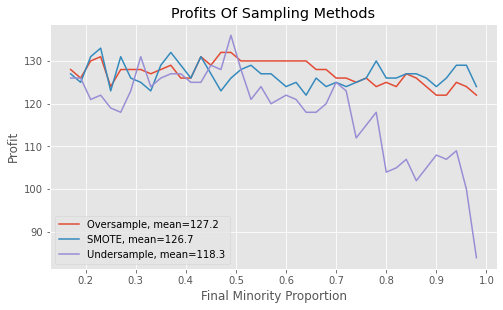

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
filepath = Path('../data/sampling_study.csv')
df = pd.read_csv(filepath).drop_duplicates()
df = df.drop(columns=['random_state', 'mnr_mjr_ratio', 'n_targeted', 
                      'n_customers'])
# Average the results from the 3 random train/test splits.
df = df.groupby(['threshold', 'samp_method', 'mnr_prop']).mean()
df = df.reset_index()

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 4.5))
for samp_method in df['samp_method'].unique():
    tmp = df[df['samp_method'] == samp_method]
    # Plot the maximum profit for each final minority proportion, 
    # ignoring the different thresholds.
    pts = tmp.groupby('mnr_prop')['exp_profit'].max()
    ax.plot(pts, label=f'{samp_method}, mean={pts.mean():.1f}')
    ax.set(title='Profits Of Sampling Methods', 
           xlabel='Final Minority Proportion', ylabel='Profit')
ax.legend()
plt.show()